In [1]:
import os
os.chdir(os.path.join(os.path.sep, 'home', 'tkokkeng', 'Documents', 'KE5105', 'ETL'))
os.getcwd()

'/home/tkokkeng/Documents/KE5105/ETL'

In [2]:
import sys
if os.path.join(os.getcwd(), 'source') not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), 'source'))
sys.path

['/home/tkokkeng/Documents/KE5105/ETL',
 '/home/tkokkeng/python/python367/tsfvenv/lib',
 '/home/tkokkeng/Documents/KE5105/ETL/source',
 '/home/tkokkeng/Documents/KE5105/ETL/source/results',
 '',
 '/home/tkokkeng/python/python367/tsfvenv/lib/python3.6/site-packages',
 '/home/tkokkeng/python/python367/tsfvenv/lib/python36.zip',
 '/home/tkokkeng/python/python367/tsfvenv/lib/python3.6',
 '/home/tkokkeng/python/python367/tsfvenv/lib/python3.6/lib-dynload',
 '/usr/lib/python3.6',
 '/home/tkokkeng/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/tkokkeng/python/python367/tsfvenv/lib/python3.6/site-packages/IPython/extensions',
 '/home/tkokkeng/.ipython']

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import datetime
import numpy as np
import myUtilities as mu
import pickle
import pandas as pd

In [6]:
mrb_train = mu.load_data_by_bldg(['MRB'], 'processed')

In [7]:
mrb_train[0][1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62880 entries, 2015-06-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 10 columns):
PWMMRIC1                     45989 non-null float64
PWMMRIC2                     45989 non-null float64
BTUMochtarRiady              45586 non-null float64
PWMMRIC1_30min_avg           45939 non-null float64
PWMMRIC2_30min_avg           45939 non-null float64
BTUMochtarRiady_30min_avg    45541 non-null float64
PWM_sumadd                   45939 non-null float64
PWM_30min_avg                45939 non-null float64
BTU_sumadd                   45541 non-null float64
BTU_30min_avg                45541 non-null float64
dtypes: float64(10)
memory usage: 5.3 MB


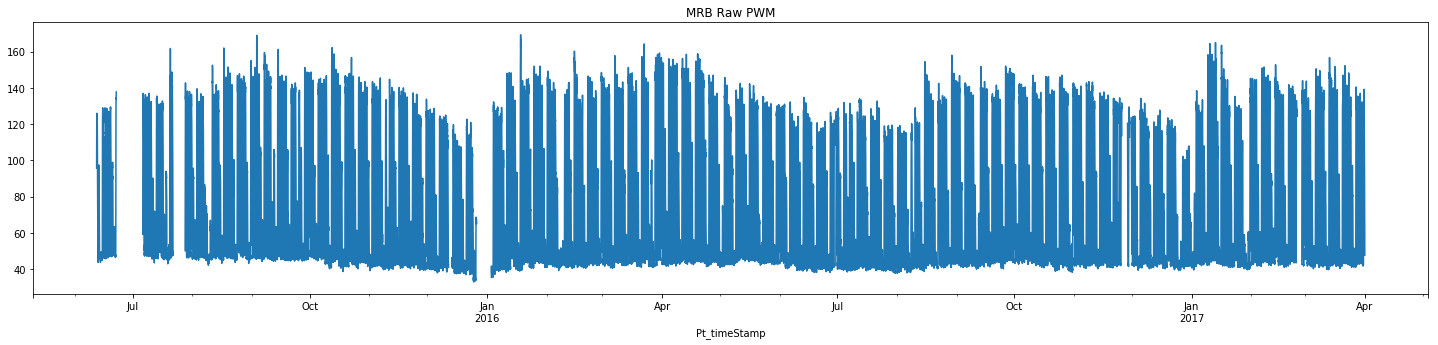

In [8]:
mrb_train_df = mrb_train[0][1]
mrb_train_df.loc[:'2017-03-31 23:30:00', 'PWM_30min_avg'].plot(figsize=(25, 5), title='MRB Raw PWM')

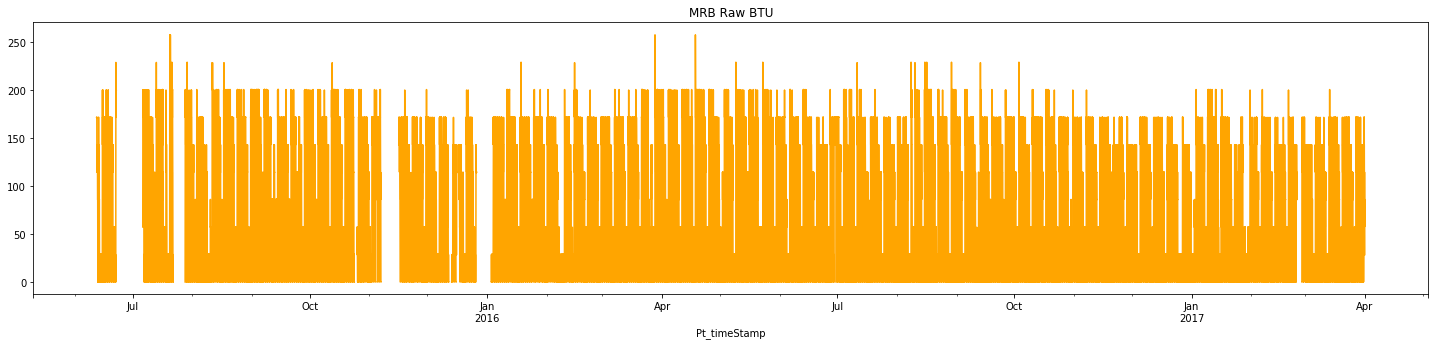

In [9]:
mrb_train_df.loc[:'2017-03-31 23:30:00', 'BTU_30min_avg'].plot(figsize=(25, 5), title='MRB Raw BTU', color='orange')

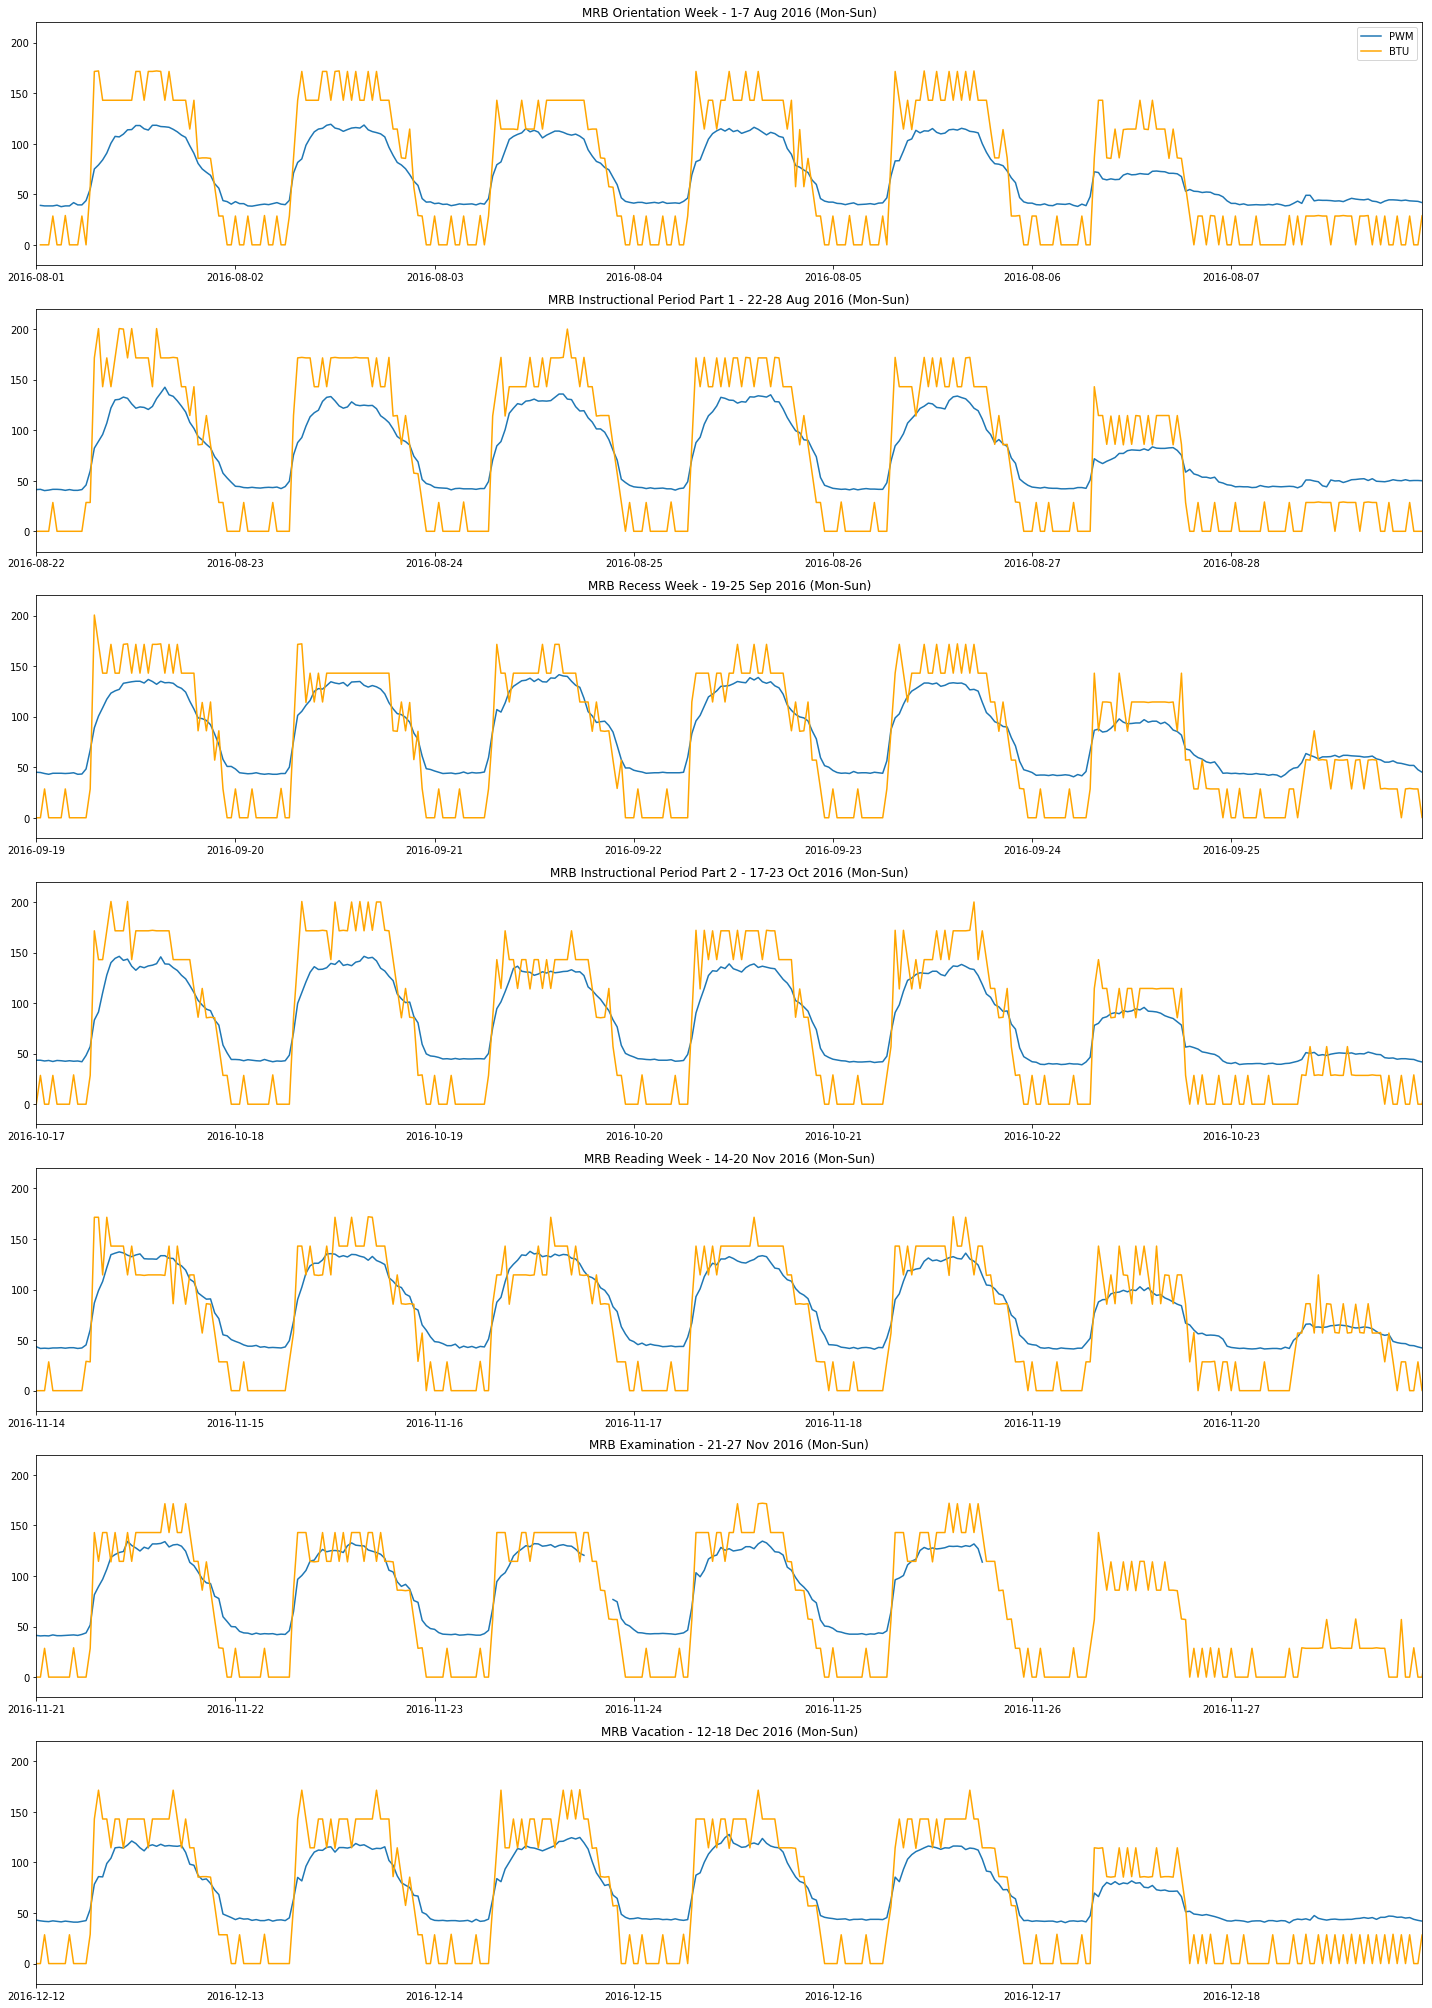

In [10]:
plt.figure(figsize=(20, 28))
plt.subplot(711)
plt.plot(mrb_train_df.loc['2016-08-01 00H':'2016-08-07 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-08-01 00H':'2016-08-07 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Orientation Week - 1-7 Aug 2016 (Mon-Sun)')
plt.legend(loc='upper right')
plt.axis(['2016-08-01 00H', '2016-08-07 23H', -20, 220])
plt.subplot(712)
plt.plot(mrb_train_df.loc['2016-08-22 00H':'2016-08-28 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-08-22 00H':'2016-08-28 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Instructional Period Part 1 - 22-28 Aug 2016 (Mon-Sun)')
plt.axis(['2016-08-22 00H', '2016-08-28 23H', -20, 220])
plt.subplot(713)
plt.plot(mrb_train_df.loc['2016-09-19 00H':'2016-09-25 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-09-19 00H':'2016-09-25 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Recess Week - 19-25 Sep 2016 (Mon-Sun)')
plt.axis(['2016-09-19 00H', '2016-09-25 23H', -20, 220])
plt.subplot(714)
plt.plot(mrb_train_df.loc['2016-10-17 00H':'2016-10-23 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-10-17 00H':'2016-10-23 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Instructional Period Part 2 - 17-23 Oct 2016 (Mon-Sun)')
plt.axis(['2016-10-17 00H', '2016-10-23 23H', -20, 220])
plt.subplot(715)
plt.plot(mrb_train_df.loc['2016-11-14 00H':'2016-11-20 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-11-14 00H':'2016-11-20 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Reading Week - 14-20 Nov 2016 (Mon-Sun)')
plt.axis(['2016-11-14 00H', '2016-11-20 23H', -20, 220])
plt.subplot(716)
plt.plot(mrb_train_df.loc['2016-11-21 00H':'2016-11-27 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-11-21 00H':'2016-11-27 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Examination - 21-27 Nov 2016 (Mon-Sun)')
plt.axis(['2016-11-21 00H', '2016-11-27 23H', -20, 220])
plt.subplot(717)
plt.plot(mrb_train_df.loc['2016-12-12 00H':'2016-12-18 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-12-12 00H':'2016-12-18 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Vacation - 12-18 Dec 2016 (Mon-Sun)')
plt.axis(['2016-12-12 00H', '2016-12-18 23H', -20, 220])
plt.tight_layout()
plt.show()

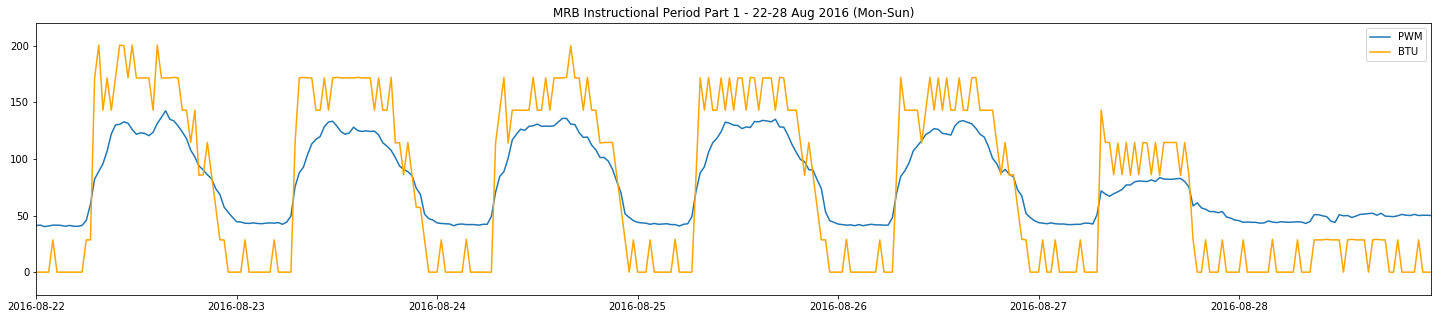

In [11]:
plt.figure(figsize=(25, 5))
plt.plot(mrb_train_df.loc['2016-08-22 00H':'2016-08-28 23H', 'PWM_30min_avg'], label='PWM')
plt.plot(mrb_train_df.loc['2016-08-22 00H':'2016-08-28 23H', 'BTU_30min_avg'], label='BTU', color='orange')
plt.title('MRB Instructional Period Part 1 - 22-28 Aug 2016 (Mon-Sun)')
plt.axis(['2016-08-22 00H', '2016-08-28 23H', -20, 220])
plt.legend(loc='upper right')

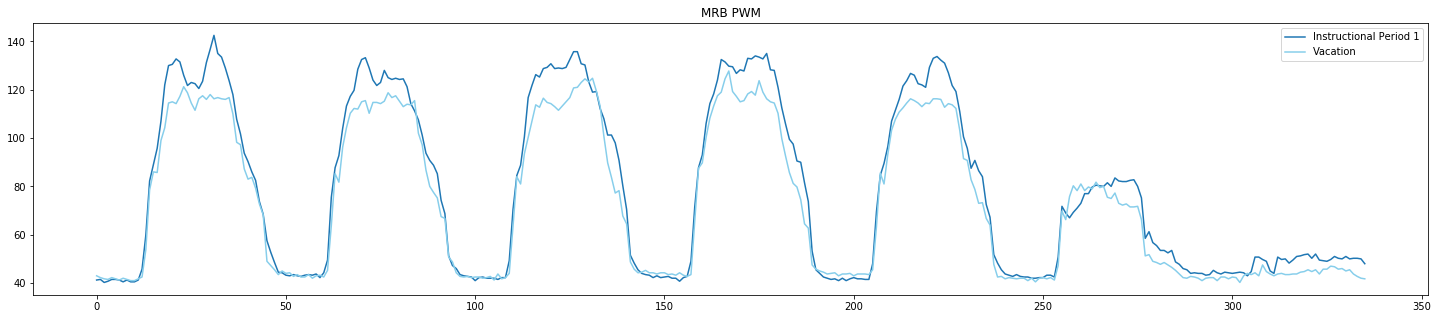

In [12]:
plt.figure(figsize=(25, 5))
# plt.plot(range(len(mrb_train_df.loc['2016-08-01 00H':'2016-08-07 23H', :])), mrb_train_df.loc['2016-08-01 00H':'2016-08-07 23H', 'PWM_30min_avg'].values, label='Orientation')
plt.plot(range(len(mrb_train_df.loc['2016-08-22 00H':'2016-08-28 23H', :])), mrb_train_df.loc['2016-08-22 00H':'2016-08-28 23H', 'PWM_30min_avg'].values, label='Instructional Period 1')
plt.plot(range(len(mrb_train_df.loc['2016-12-12 00H':'2016-12-18 23H', :])), mrb_train_df.loc['2016-12-12 00H':'2016-12-18 23H', 'PWM_30min_avg'].values, label='Vacation', color='skyblue')
plt.title('MRB PWM')
plt.legend(loc='upper right')
#plt.axis(['2016-08-01 00H', '2016-08-07 23H', -20, 200])

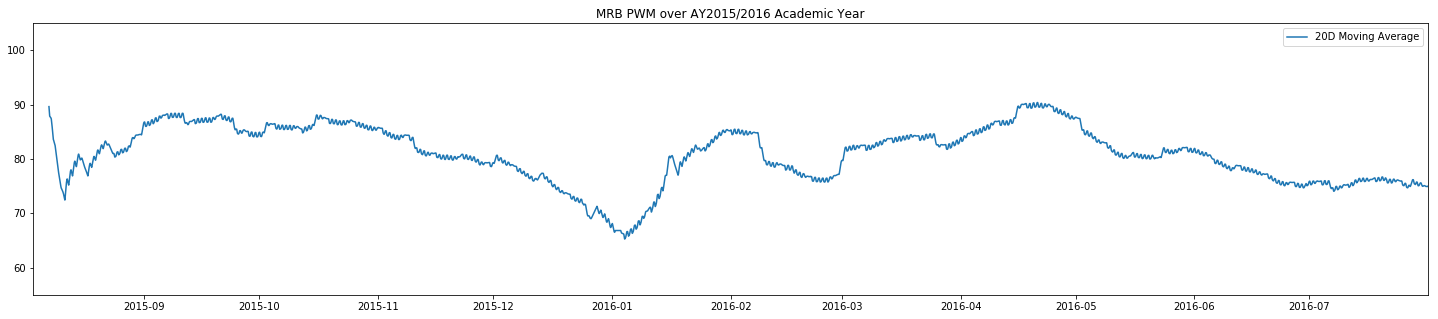

In [29]:
plt.figure(figsize=(25, 5))
# plt.plot(mrb_train_df.loc['2015-08-03 01H':'2016-07-31 23H', 'PWM_30min_avg'], alpha=0.5)
plt.plot(mrb_train_df.loc['2015-08-03 00H':'2016-07-31 23H', 'PWM_30min_avg'].rolling(1000, min_periods=200).mean(), label='20D Moving Average')
plt.axis(['2015-08-03 00H','2016-07-31 23H', 55, 105])
plt.legend()
plt.title('MRB PWM over AY2015/2016 Academic Year')
plt.show()

## Plot Histories Base Models

In [6]:
with open(os.path.join('final results', 'models', 'MRB-3base-4x128gru-2x32dense-histories-epch250.pkl'), 'rb') as infile:
    histories1 = pickle.load(infile)

In [9]:
with open(os.path.join('final results', 'models', 'MRB-3base-4x64gru-1x32dense-histories-epch500.pkl'), 'rb') as infile:
    histories2 = pickle.load(infile)

In [10]:
with open(os.path.join('final results', 'models', 'MRB-3base-4x32gru-histories-epch600.pkl'), 'rb') as infile:
    histories3 = pickle.load(infile)

In [11]:
with open(os.path.join('final results', 'models', 'MRB-1base-2x32gru-histories-epch800.pkl'), 'rb') as infile:
    histories4 = pickle.load(infile)

In [96]:
all_metrics_df = pd.DataFrame()
labs = ['4x128gru 2x32d', '4x64gru 1x32d', '4x32gru', '2x32gru']
for idx, hist in enumerate([histories1, histories2, histories3, histories4]):
    
    train_loss = []
    val_loss = []
    train_mape = []
    val_mape = []

    for h in hist:
        for a_loss in h['loss']:
            train_loss.append(a_loss)
        for a_loss in h['val_loss']:
            val_loss.append(a_loss)
        # for a_mape in h['mape_skip_zeros']:
        #     train_mape.append(a_mape)
        # for a_mape in h['val_mape_skip_zeros']:
        #     val_mape.append(a_mape)

    all_metrics_df = pd.concat([all_metrics_df, pd.DataFrame(train_loss, columns=[labs[idx] + '_train_mae']), pd.DataFrame(val_loss, columns=[labs[idx] + '_val_mae'])],
                               axis=1)

In [97]:
all_metrics_df.head()

,4x128gru 2x32d_train_mae,4x128gru 2x32d_val_mae,4x64gru 1x32d_train_mae,4x64gru 1x32d_val_mae,4x32gru_train_mae,4x32gru_val_mae,2x32gru_train_mae,2x32gru_val_mae
0,0.111087,0.099286,0.094573,0.053994,0.091335,0.052423,0.077582,0.046286
1,0.064356,0.077982,0.059871,0.035032,0.053775,0.041833,0.040007,0.039078
2,0.053392,0.039045,0.047140,0.037843,0.043244,0.032603,0.033590,0.026344
3,0.045737,0.076131,0.044177,0.036604,0.037926,0.044497,0.030793,0.025191
4,0.043543,0.031682,0.037985,0.028645,0.035008,0.027458,0.028233,0.027436


In [98]:
all_metrics_df[240:260]

,4x128gru 2x32d_train_mae,4x128gru 2x32d_val_mae,4x64gru 1x32d_train_mae,4x64gru 1x32d_val_mae,4x32gru_train_mae,4x32gru_val_mae,2x32gru_train_mae,2x32gru_val_mae
240,0.010695,0.018384,0.012640,0.017240,0.013322,0.016178,0.014009,0.018549
241,0.010802,0.017782,0.012605,0.016470,0.013400,0.016236,0.013812,0.018511
242,0.010609,0.016588,0.012697,0.016932,0.013317,0.019019,0.013978,0.016356
243,0.010705,0.018028,0.012541,0.016896,0.013428,0.017210,0.013789,0.016388
244,0.010729,0.016614,0.012725,0.016794,0.013448,0.017665,0.013829,0.018286
245,0.010476,0.018418,0.012488,0.017660,0.013199,0.016961,0.013899,0.016250
246,0.010728,0.018062,0.012553,0.016549,0.013339,0.017934,0.013884,0.016608
247,0.010570,0.018971,0.012534,0.017773,0.013193,0.019309,0.013878,0.017746
248,0.010562,0.016851,0.012464,0.016527,0.013314,0.016718,0.013721,0.016461
249,0.010649,0.017419,0.012332,0.018742,0.013357,0.016190,0.013889,0.016585


In [99]:
win = 30
colnames = all_metrics_df.columns.tolist()
smoothed = all_metrics_df.rolling(win).mean()
smoothed.columns = list(map(lambda x: x + '_smoothed', colnames))
all_metrics_df = pd.concat([all_metrics_df, smoothed], axis=1)

In [100]:
all_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
4x128gru 2x32d_train_mae             250 non-null float64
4x128gru 2x32d_val_mae               250 non-null float64
4x64gru 1x32d_train_mae              500 non-null float64
4x64gru 1x32d_val_mae                500 non-null float64
4x32gru_train_mae                    600 non-null float64
4x32gru_val_mae                      600 non-null float64
2x32gru_train_mae                    800 non-null float64
2x32gru_val_mae                      800 non-null float64
4x128gru 2x32d_train_mae_smoothed    221 non-null float64
4x128gru 2x32d_val_mae_smoothed      221 non-null float64
4x64gru 1x32d_train_mae_smoothed     471 non-null float64
4x64gru 1x32d_val_mae_smoothed       471 non-null float64
4x32gru_train_mae_smoothed           571 non-null float64
4x32gru_val_mae_smoothed             571 non-null float64
2x32gru_train_mae_smoothed           771 non-null float64
2x32gru_val_mae_smoothed 

In [109]:
all_metrics_df.iloc[:, 9].min()

0.01696540886729112

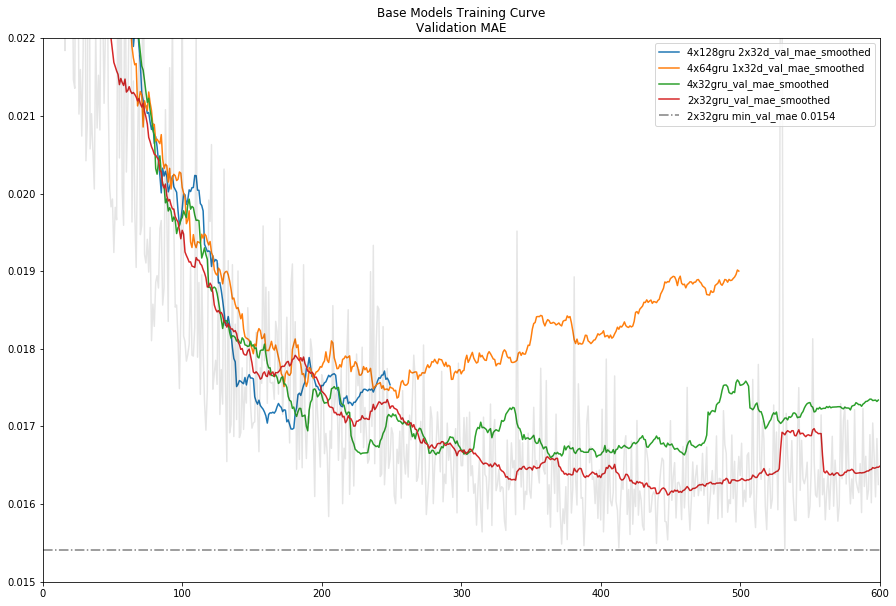

In [127]:
epochs = len(all_metrics_df)
all_metrics_df.iloc[:, [9, 11, 13, 15]].plot(figsize=(15, 10))
plt.ylim((0.015, 0.022))
plt.xlim((0, 600))
plt.plot(range(600), all_metrics_df.iloc[:600, [7]], color='black', alpha=.1)
plt.hlines(y=all_metrics_df.loc[:, '2x32gru_val_mae'].min(), xmin=0, xmax=600, linestyles='dashdot', alpha=.5,
           label='2x32gru min_val_mae ' + '{0:.4f}'.format(all_metrics_df.loc[:, '2x32gru_val_mae'].min()))
plt.title('Base Models Training Curve\nValidation MAE')
plt.legend(loc='upper right')
plt.show()

## Plot Histories Weight Regularised Models 4x128 GRU 2x32 Dense

In [152]:
histories_list = []
with open(os.path.join('final results', 'models', 'MRB-3base-4x128gru-2x32dense-histories-epch250.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-wgtreg-4x128gru-2x32dense-histories-epch400.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-11wgtreg-4x128gru-2x32dense-histories-epch500.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-10wgtreg-4x128gru-2x32dense-histories-epch500.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-1wgtreg-4x128gru-2x32dense-histories-epch1000.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-2wgtreg-4x128gru-2x32dense-histories-epch1000.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-5wgtreg-4x128gru-2x32dense-histories-epch400.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-4wgtreg-4x128gru-2x32dense-histories-epch800.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-3wgtreg-4x128gru-2x32dense-histories-epch600.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'models', 'MRB-wgtreg20-4x128gru-2x32dense-histories-epch700.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'models', 'MRB-wgtreg1-4x128gru-2x32dense-histories-epch700.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))


In [153]:
all_metrics_df = pd.DataFrame()
labs = ['Base', 'L1L2 1e-7', 'L1L2 3e-7 recurrent layers only', 'L1L2 3e-7', 'L1L2 5e-7', 'L1L2 1e-6', 'L1L2 3e-6', 'L1L2 5e-6', 'L1L2 1e-5', 'L1L2 3e-7 recurrent layers only ADAM', 'L1L2 3e-7 ADAM']
for idx, hist in enumerate(histories_list):
    
    train_loss = []
    val_loss = []
    train_mape = []
    val_mape = []

    for h in hist:
        # for a_loss in h['loss']:
        #     train_loss.append(a_loss)
        for a_loss in h['val_loss']:
            val_loss.append(a_loss)
        # for a_mape in h['mape_skip_zeros']:
        #     train_mape.append(a_mape)
        # for a_mape in h['val_mape_skip_zeros']:
        #     val_mape.append(a_mape)

    all_metrics_df = pd.concat([all_metrics_df, pd.DataFrame(val_loss, columns=[labs[idx]])],
                               axis=1)

In [154]:
all_metrics_df.head()

,Base,L1L2 1e-7,L1L2 3e-7 recurrent layers only,L1L2 3e-7,L1L2 5e-7,L1L2 1e-6,L1L2 3e-6,L1L2 5e-6,L1L2 1e-5,L1L2 3e-7 recurrent layers only ADAM,L1L2 3e-7 ADAM
0,0.099286,0.040933,0.072460,0.038605,0.086185,0.109599,0.073050,0.072489,0.105735,0.039612,0.044682
1,0.077982,0.038372,0.091769,0.072692,0.068077,0.056805,0.072060,0.071800,0.104594,0.030553,0.029918
2,0.039045,0.043413,0.049530,0.037206,0.070860,0.087018,0.046497,0.075302,0.099486,0.040464,0.040302
3,0.076131,0.043427,0.057921,0.054610,0.045523,0.055398,0.070796,0.095217,0.073143,0.028741,0.027134
4,0.031682,0.038504,0.044455,0.077259,0.063069,0.044282,0.078571,0.078686,0.082906,0.025986,0.029260


In [155]:
win = 30
colnames = all_metrics_df.columns.tolist()
smoothed = all_metrics_df.rolling(win).mean()
smoothed.columns = list(map(lambda x: x + '_smoothed', colnames))
all_metrics_df = pd.concat([all_metrics_df, smoothed], axis=1)

In [156]:
all_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Base                                             250 non-null float64
L1L2 1e-7                                        400 non-null float64
L1L2 3e-7 recurrent layers only                  500 non-null float64
L1L2 3e-7                                        500 non-null float64
L1L2 5e-7                                        1000 non-null float64
L1L2 1e-6                                        1000 non-null float64
L1L2 3e-6                                        400 non-null float64
L1L2 5e-6                                        800 non-null float64
L1L2 1e-5                                        600 non-null float64
L1L2 3e-7 recurrent layers only ADAM             700 non-null float64
L1L2 3e-7 ADAM                                   700 non-null float64
Base_smoothed                                    221 non-null float64
L1L2 1e-7_smoothed                               371

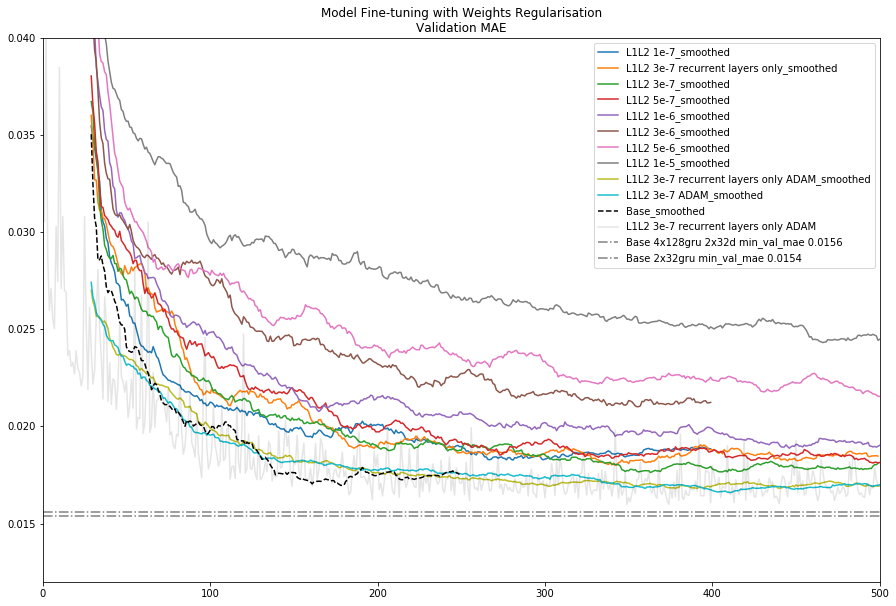

In [160]:
epochs = len(all_metrics_df)
all_metrics_df.iloc[:, 12:].plot(figsize=(15, 10))
plt.ylim((0.012, 0.04))
plt.xlim((0, 500))
plt.plot(range(500), all_metrics_df.iloc[:500, 11], color='black', linestyle='--')  # Base
plt.plot(range(500), all_metrics_df.iloc[:500, 9], color='black', alpha=.1)  # best no smoothing
plt.hlines(y=0.0156, xmin=0, xmax=500, linestyles='dashdot', alpha=.5,
           label='Base 4x128gru 2x32d min_val_mae 0.0156')
plt.hlines(y=0.0154, xmin=0, xmax=500, linestyles='dashdot', alpha=.5,
           label='Base 2x32gru min_val_mae 0.0154')
plt.title('Model Fine-tuning with Weights Regularisation\nValidation MAE')
plt.legend(loc='upper right')
plt.show()

## Plot Histories Weight Regularised Models 4x64 GRU 1x32 Dense

In [161]:
histories_list = []
with open(os.path.join('final results', 'models', 'MRB-3base-4x64gru-1x32dense-histories-epch500.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-0wgtreg-4x64gru-1x32dense-histories-epch700.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))
with open(os.path.join('final results', 'colab models', 'MRB-1wgtreg-4x64gru-1x32dense-histories-epch800.pkl'), 'rb') as infile:
    histories_list.append(pickle.load(infile))

In [162]:
all_metrics_df = pd.DataFrame()
labs = ['Base', 'L1L2 3e-7 ADAM', 'L1L2 5e-7 ADAM']
for idx, hist in enumerate(histories_list):
    
    train_loss = []
    val_loss = []
    train_mape = []
    val_mape = []

    for h in hist:
        # for a_loss in h['loss']:
        #     train_loss.append(a_loss)
        for a_loss in h['val_loss']:
            val_loss.append(a_loss)
        # for a_mape in h['mape_skip_zeros']:
        #     train_mape.append(a_mape)
        # for a_mape in h['val_mape_skip_zeros']:
        #     val_mape.append(a_mape)

    all_metrics_df = pd.concat([all_metrics_df, pd.DataFrame(val_loss, columns=[labs[idx]])],
                               axis=1)

In [163]:
all_metrics_df.head()

,Base,L1L2 3e-7 ADAM,L1L2 5e-7 ADAM
0,0.053994,0.037865,0.042005
1,0.035032,0.032554,0.041165
2,0.037843,0.026436,0.028650
3,0.036604,0.026710,0.040683
4,0.028645,0.026694,0.025669


In [164]:
win = 30
colnames = all_metrics_df.columns.tolist()
smoothed = all_metrics_df.rolling(win).mean()
smoothed.columns = list(map(lambda x: x + '_smoothed', colnames))
all_metrics_df = pd.concat([all_metrics_df, smoothed], axis=1)

In [165]:
all_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
Base                       500 non-null float64
L1L2 3e-7 ADAM             700 non-null float64
L1L2 5e-7 ADAM             800 non-null float64
Base_smoothed              471 non-null float64
L1L2 3e-7 ADAM_smoothed    671 non-null float64
L1L2 5e-7 ADAM_smoothed    771 non-null float64
dtypes: float64(6)
memory usage: 37.6 KB


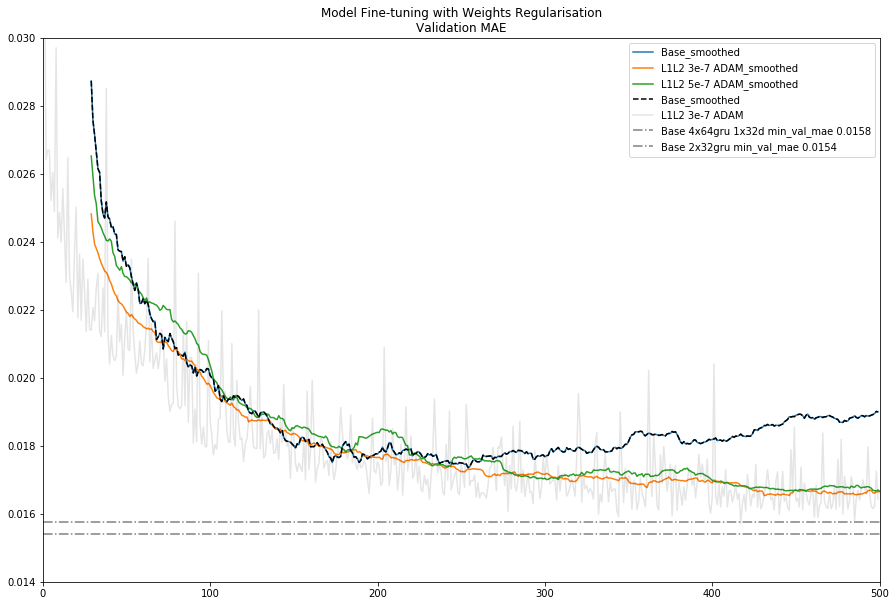

In [171]:
epochs = len(all_metrics_df)
all_metrics_df.iloc[:, 3:].plot(figsize=(15, 10))
plt.ylim((0.014, 0.03))
plt.xlim((0, 500))
plt.plot(range(500), all_metrics_df.iloc[:500, 3], color='black', linestyle='--')  # Base
plt.plot(range(500), all_metrics_df.iloc[:500, 1], color='black', alpha=.1)  # best no smoothing
plt.hlines(y=all_metrics_df.iloc[:, 0].min(), xmin=0, xmax=500, linestyles='dashdot', alpha=.5,
           label='Base 4x64gru 1x32d min_val_mae ' + '{0:.4f}'.format(all_metrics_df.iloc[:, 0].min()))
plt.hlines(y=0.0154, xmin=0, xmax=500, linestyles='dashdot', alpha=.5,
           label='Base 2x32gru min_val_mae 0.0154')
plt.title('Model Fine-tuning with Weights Regularisation\nValidation MAE')
plt.legend(loc='upper right')
plt.show()